In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('TXN_Tagged.csv')

In [3]:
data_amt = data[['amount','transactionTimestamp','type']]

In [4]:
data_amt.transactionTimestamp = data_amt.transactionTimestamp.astype(str)
data_amt['transactionTimestamp'] = data_amt.transactionTimestamp.apply(lambda x: x.split('T')[0])

C:\Users\VatsalThink\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\VATSAL~1\AppData\Local\Temp/ipykernel_10416/2380951242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_amt['transactionTimestamp'] = data_amt.transactionTimestamp.apply(lambda x: x.split('T')[0])


C:\Users\VATSAL~1\AppData\Local\Temp/ipykernel_10416/2192778391.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


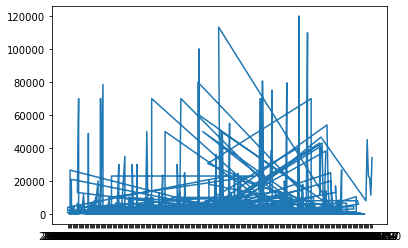

In [7]:
data_debit = data_amt[data_amt['type'] == 'DEBIT']

fig, ax = plt.subplots()
ax.plot(data_debit['transactionTimestamp'],data_debit['amount'])
fig.show()

In [10]:
data_debit['month'] = data_debit.transactionTimestamp.apply(lambda x: x.split('-')[1])
data_debit['year'] = data_debit.transactionTimestamp.apply(lambda x: x.split('-')[0])

C:\Users\VATSAL~1\AppData\Local\Temp/ipykernel_10416/546803019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_debit['month'] = data_debit.transactionTimestamp.apply(lambda x: x.split('-')[1])
C:\Users\VATSAL~1\AppData\Local\Temp/ipykernel_10416/546803019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_debit['year'] = data_debit.transactionTimestamp.apply(lambda x: x.split('-')[0])


In [13]:
debit_monthly = data_debit.groupby(['year','month'])['amount'].sum()
debit_monthly = pd.DataFrame(debit_monthly)
debit_monthly.reset_index(inplace=True)

In [17]:
debit_monthly

,year,month,amount
0,2019,08,328576.25
1,2019,09,339697.58
2,2019,10,289680.82
3,2019,11,545723.41
4,2019,12,454487.50
5,2020,01,315961.93
6,2020,02,312331.30
7,2020,03,463268.24
8,2020,04,548179.80
9,2020,05,359114.28


In [19]:
# debit_monthly = debit_monthly.apply(lambda x['date'] : "{}-{}".format(x['year'],x['month']))

debit_monthly['date'] = debit_monthly['year'].str.cat(debit_monthly['month'].astype(str), sep = '-')

In [46]:
credit_monthly

,year,month,amount,date
0,2019,08,318481.36,2019-08
1,2019,09,304543.99,2019-09
2,2019,10,330138.97,2019-10
3,2019,11,515733.48,2019-11
4,2019,12,472372.62,2019-12
5,2020,01,352747.19,2020-01
6,2020,02,373702.35,2020-02
7,2020,03,562758.97,2020-03
8,2020,04,380963.61,2020-04
9,2020,05,270466.00,2020-05


C:\Users\VATSAL~1\AppData\Local\Temp/ipykernel_10416/3648415145.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


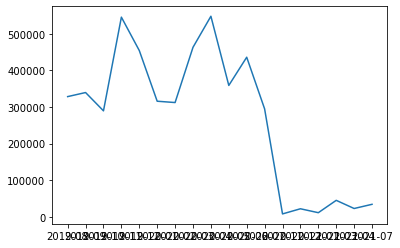

In [22]:
debit_monthly
fig, ax = plt.subplots()
ax.plot(debit_monthly['date'],debit_monthly['amount'])
fig.show()

C:\Users\VATSAL~1\AppData\Local\Temp/ipykernel_10416/695801532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_credit['month'] = data_credit.transactionTimestamp.apply(lambda x: x.split('-')[1])
C:\Users\VATSAL~1\AppData\Local\Temp/ipykernel_10416/695801532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_credit['year'] = data_credit.transactionTimestamp.apply(lambda x: x.split('-')[0])
C:\Users\VATSAL~1\AppData\Local\Temp/ipykernel_10416/695801532.py:10: UserWarning: Matplotlib is currentl

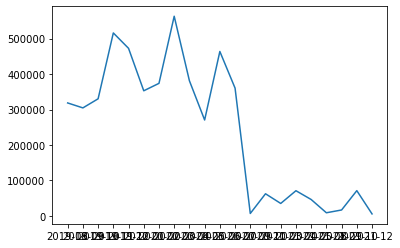

In [23]:
data_credit = data_amt[data_amt['type'] == 'CREDIT']
data_credit['month'] = data_credit.transactionTimestamp.apply(lambda x: x.split('-')[1])
data_credit['year'] = data_credit.transactionTimestamp.apply(lambda x: x.split('-')[0])
credit_monthly = data_credit.groupby(['year','month'])['amount'].sum()
credit_monthly = pd.DataFrame(credit_monthly)
credit_monthly.reset_index(inplace=True)
credit_monthly['date'] = credit_monthly['year'].str.cat(credit_monthly['month'].astype(str), sep = '-')
fig, ax = plt.subplots()
ax.plot(credit_monthly['date'],credit_monthly['amount'])
fig.show()




In [27]:
debit_monthly

,year,month,amount,date
0,2019,08,328576.25,2019-08
1,2019,09,339697.58,2019-09
2,2019,10,289680.82,2019-10
3,2019,11,545723.41,2019-11
4,2019,12,454487.50,2019-12
5,2020,01,315961.93,2020-01
6,2020,02,312331.30,2020-02
7,2020,03,463268.24,2020-03
8,2020,04,548179.80,2020-04
9,2020,05,359114.28,2020-05


In [38]:
debit_credit = data_amt.groupby(['type'])['amount'].sum()
debit_credit = pd.DataFrame(debit_credit)
# debit_credit.reset_index(inplace=True)
debit_credit = debit_credit.T

In [42]:
debit_credit.to_excel('debit-credit.xlsx')

C:\Users\VATSAL~1\AppData\Local\Temp/ipykernel_10416/954098816.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


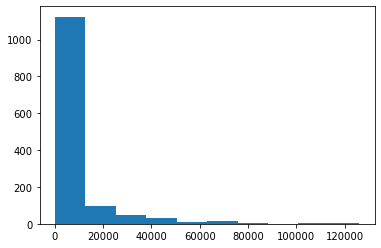

In [43]:
fig, ax = plt.subplots()
ax.hist(data_amt['amount'])
fig.show()

In [45]:
data_amt.to_excel('debit-credit-full.xlsx')